In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df=pd.read_csv('avacado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# EDA

In [3]:
df.shape

(16468, 14)

We have 16468 rows and 14 columns

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

we can see the date is not the date type but the object so we have to change this

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


We have splitted the date into year,month,day variable

In [7]:
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

we dropped the not required columns

In [8]:
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

We have null values in the dataset

In [9]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

14950


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have 14950 duplicate rows with null values

In [10]:
df=df.dropna()

In [11]:
df.shape

(1517, 14)

In [12]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

Null values are removed succesfully from the dataset

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Data values are large we will be required to scale the dataset before building the model

# Data Visualization

<AxesSubplot:>

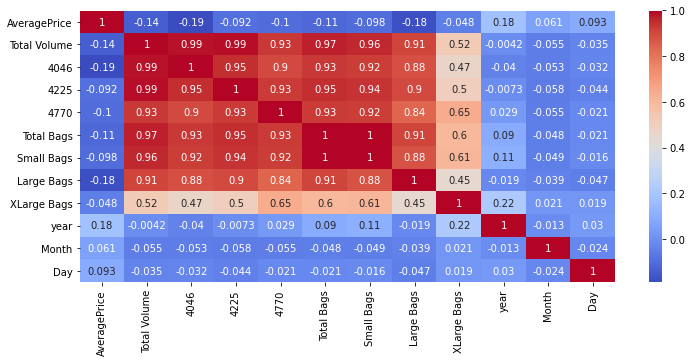

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

As we can see from the heatmap , all the Features are not correleted with the Average Price column,

In [15]:
df.nunique()

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
Day               31
dtype: int64

Type has only 1 value in all rows this column can be dropped

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

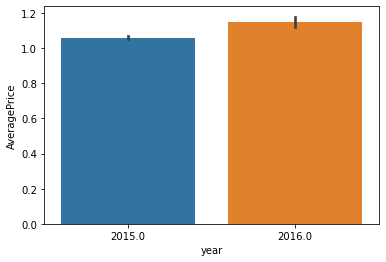

In [16]:
sns.barplot(x='year',y='AveragePrice',data=df)

In the year 2016 the average price is more than in the year 2015

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

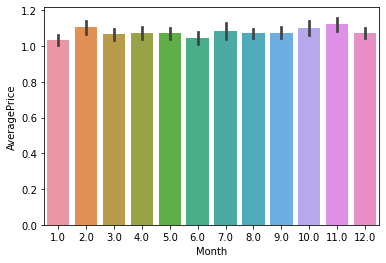

In [17]:
sns.barplot(x='Month',y='AveragePrice',data=df)

we can see Nov ,feb have highest average price

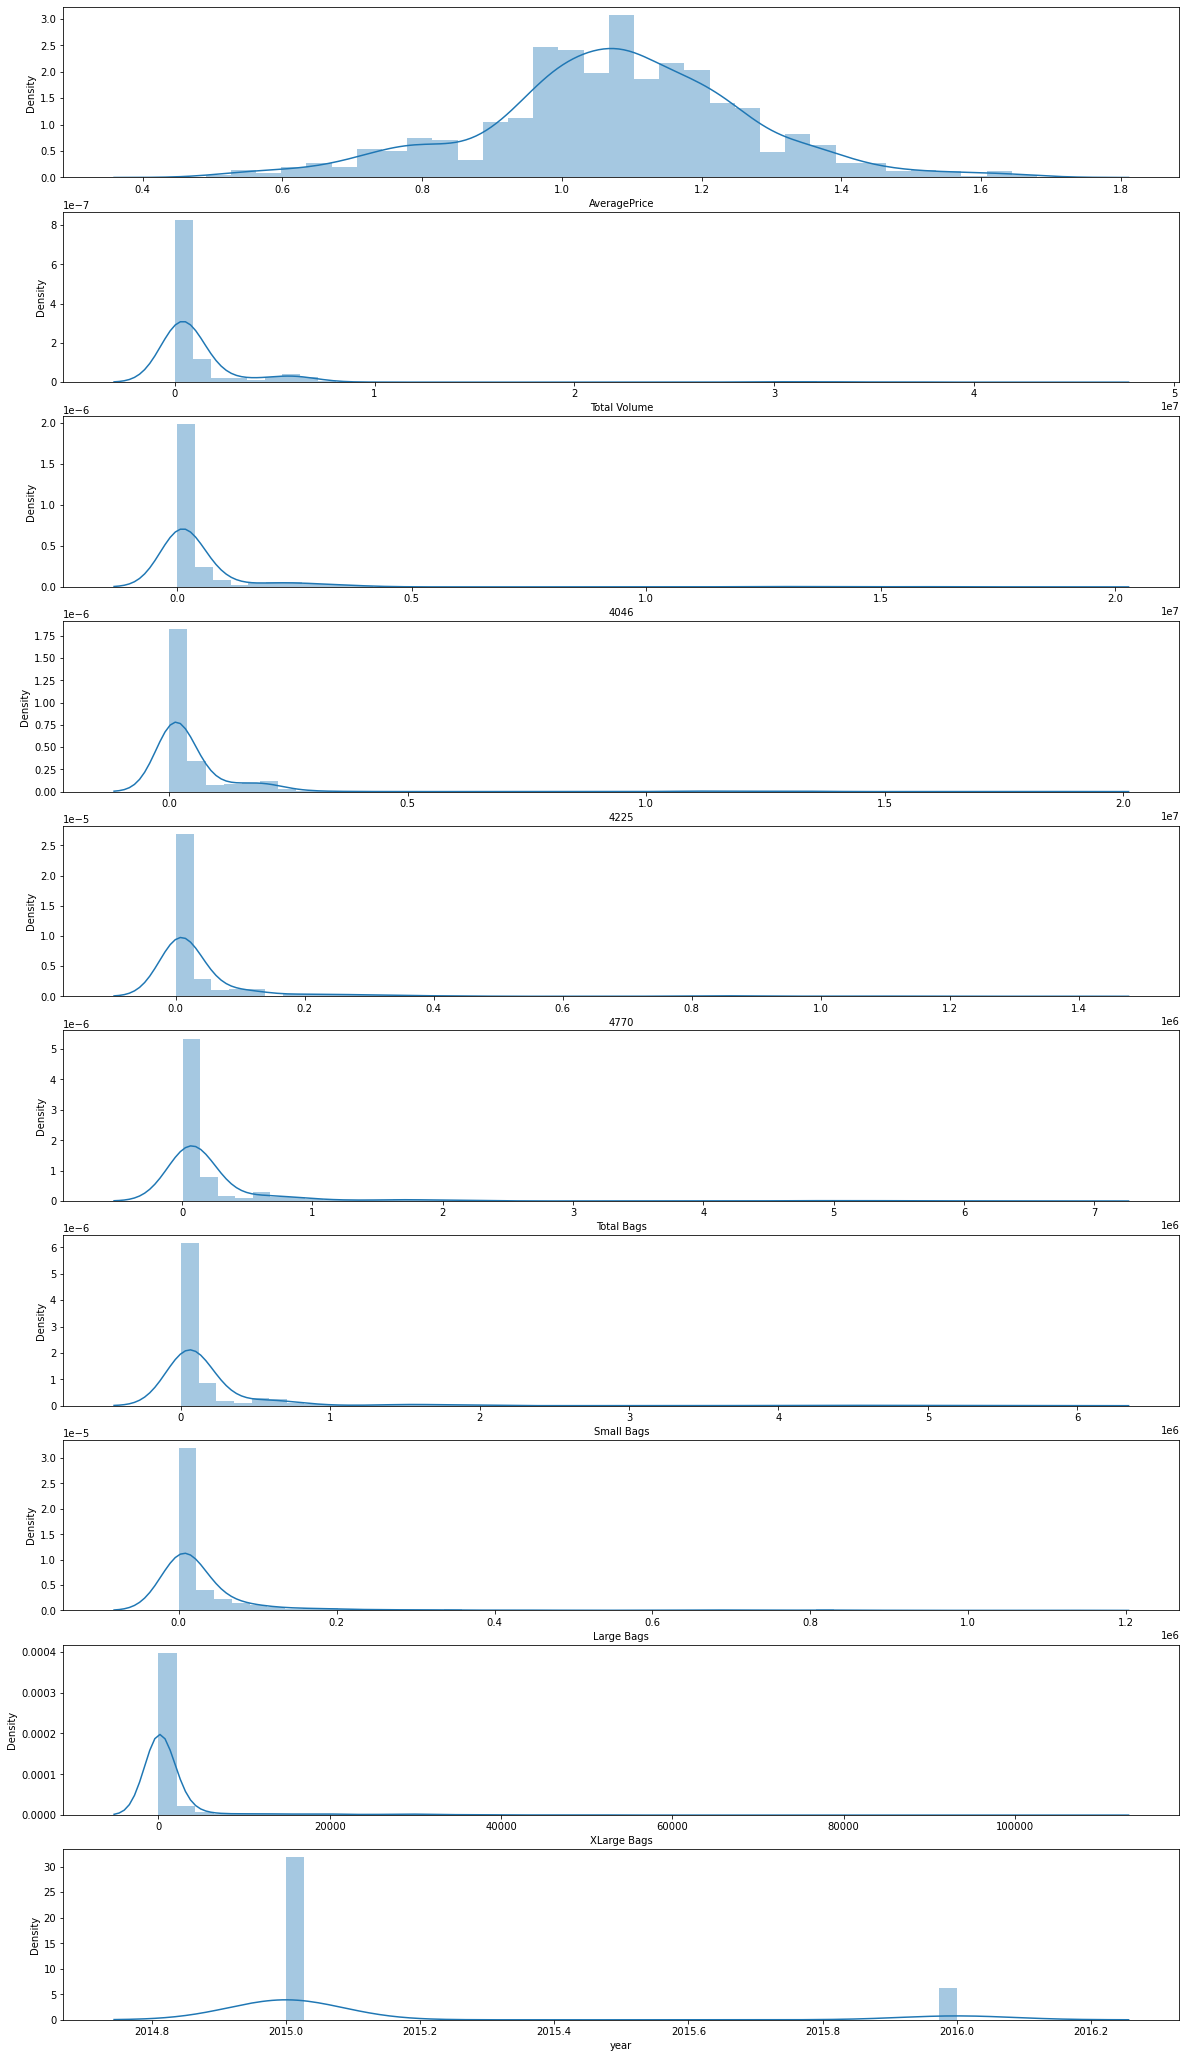

In [18]:
counter=1
plt.figure(figsize=(20,150))
columns = ['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

Data in year is not normally distributed, We can observe that dataset might be skewed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'DallasFtWorth'),
  Text(11, 0, 'Denver'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'GrandRapids'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'HarrisburgScranton'),
  Text(16, 0, 'HartfordSpringfield'),
  Text(17, 0, 'Houston'),
  Text(18, 0, 'Indianapolis'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'LasVegas'),
  Text(21, 0, 'LosAngeles'),
  Text(22, 0, 'Louisville'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Midsouth'),
  Text(25, 0, 'Nashville'),
  Text(26, 0, 'N

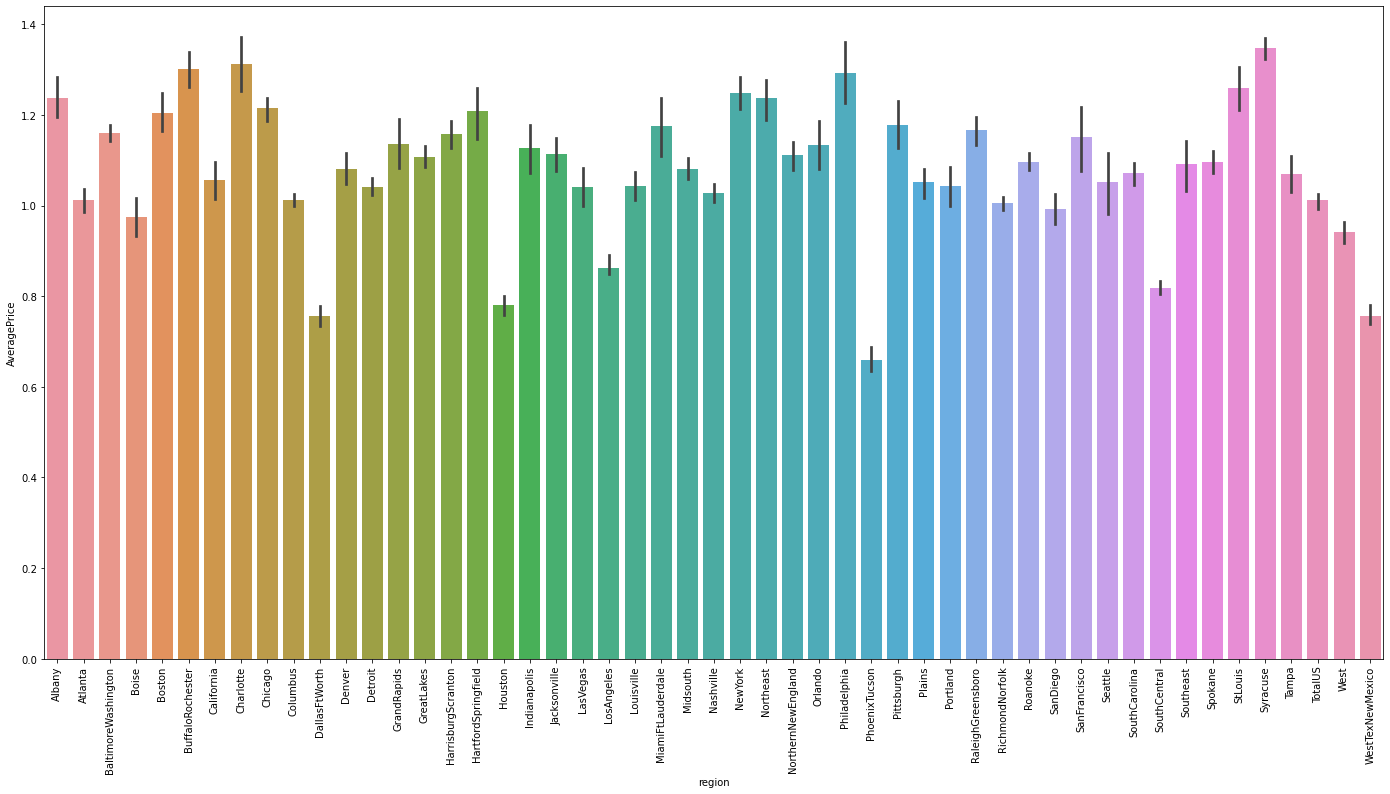

In [19]:
plt.figure(figsize=(24,12))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

These regions have the highest price Syracuse,Charlotte,Philadelphia


Text(0.5, 1.0, 'Average Price')

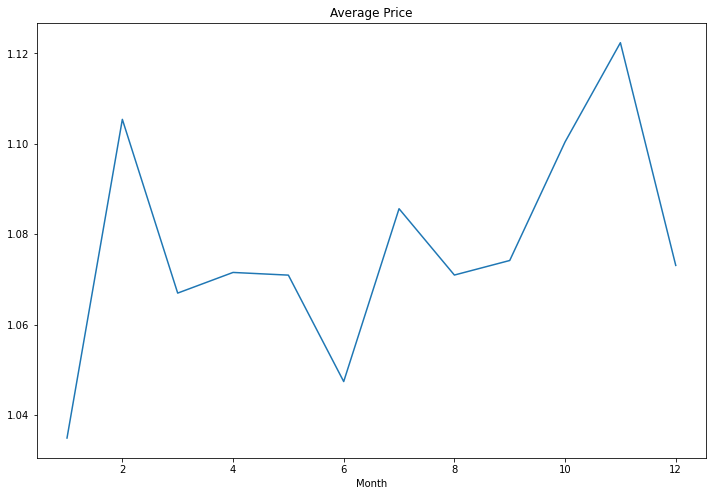

In [20]:
d=df.groupby('Month').mean()
plt.figure(figsize=(12,8))
d['AveragePrice'].plot()
plt.title('Average Price')

 We can see there is huge increase in price around november

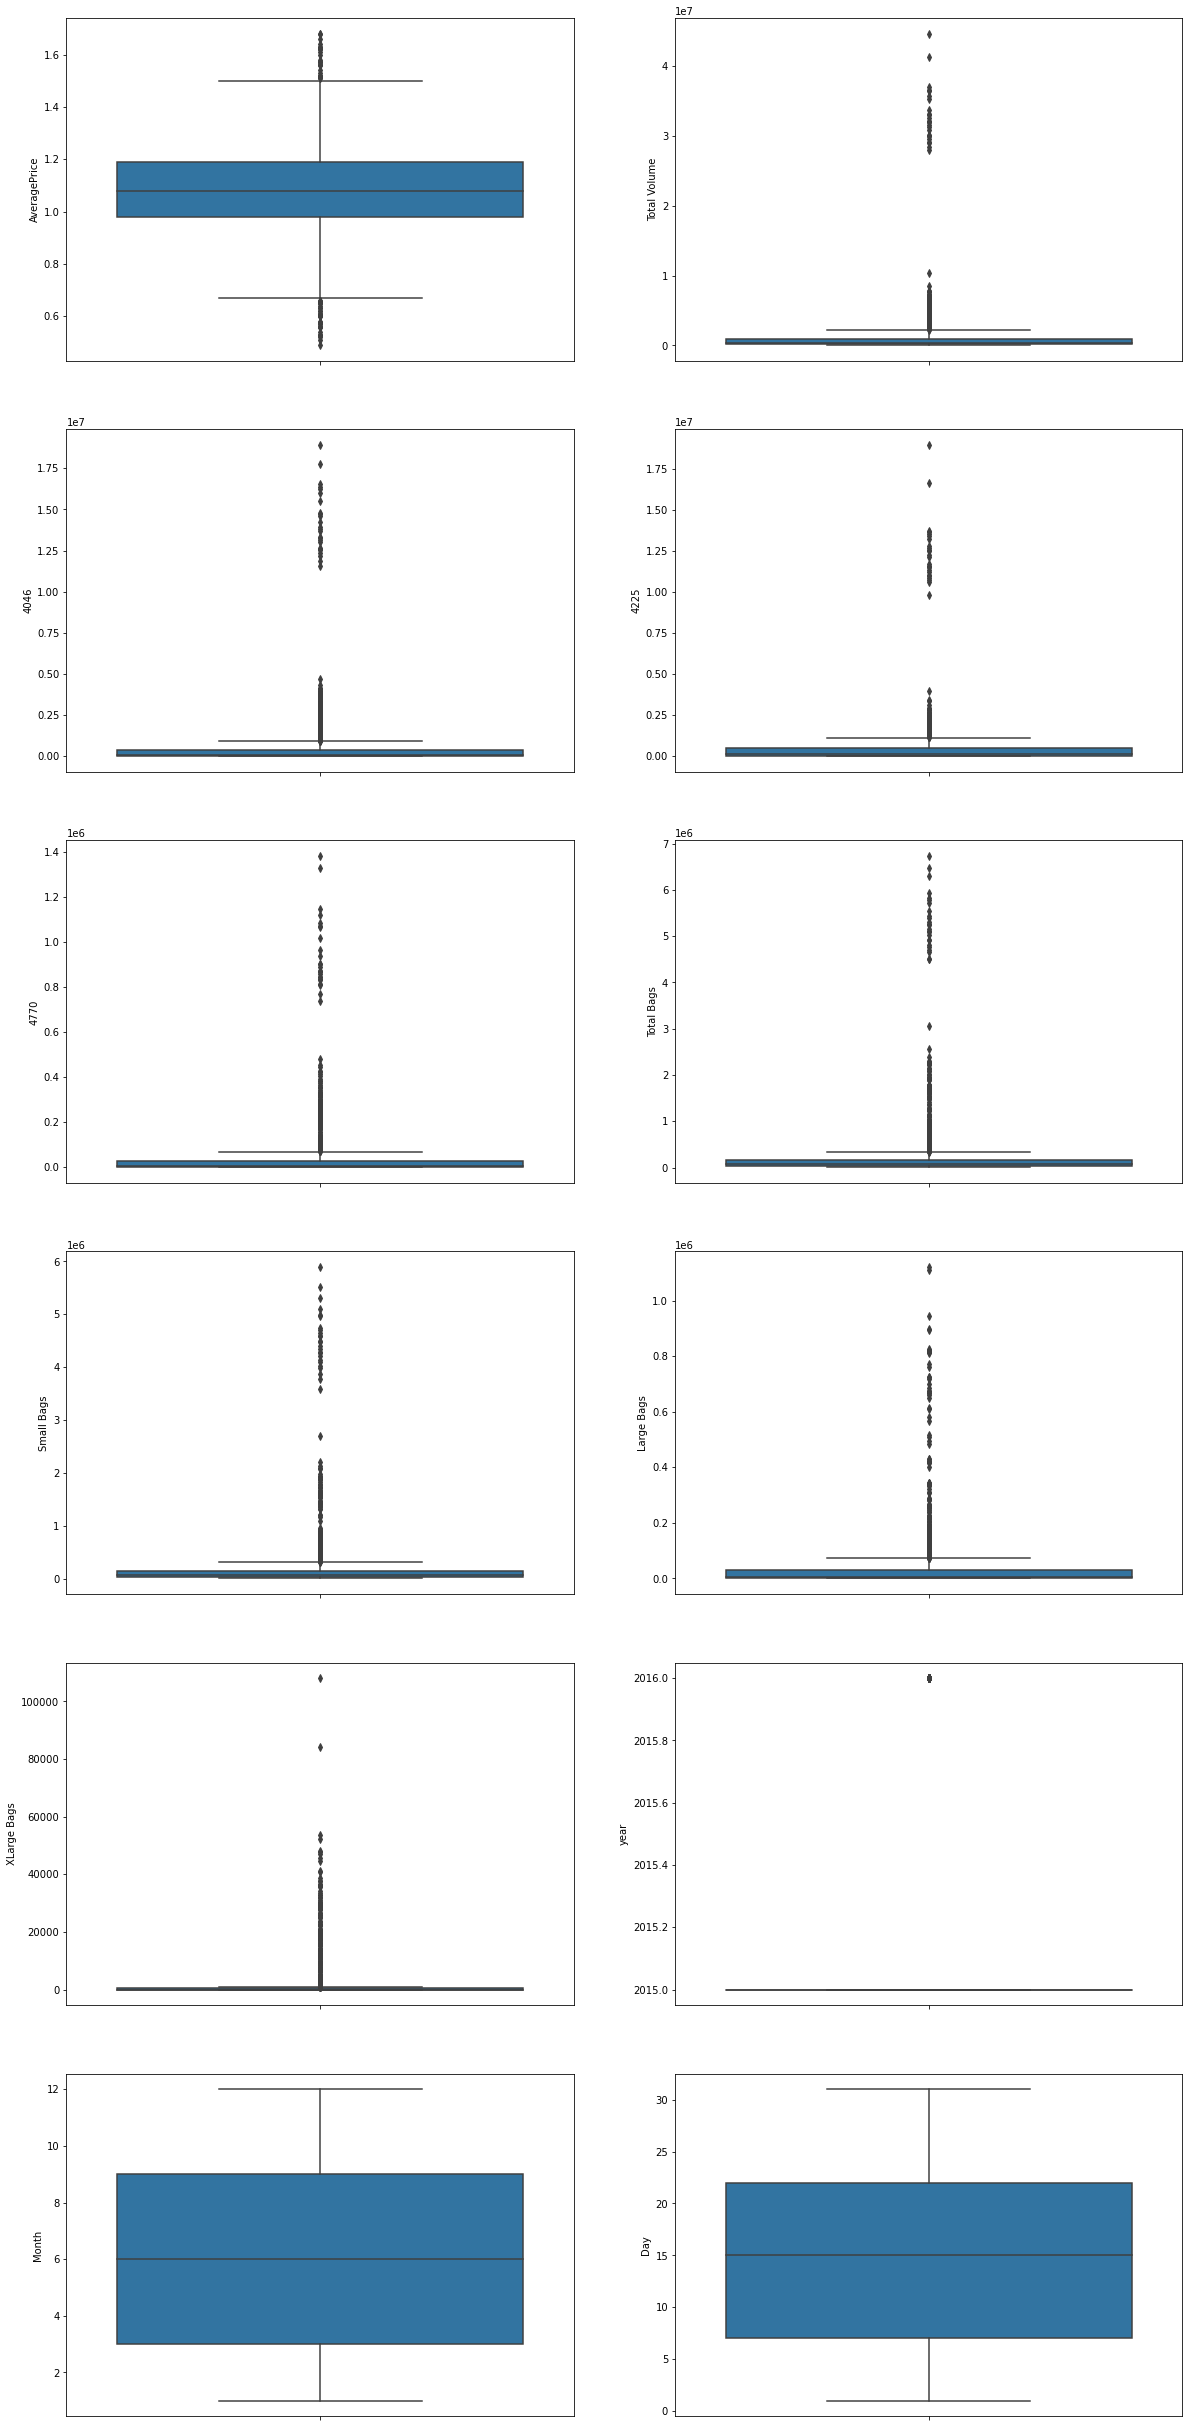

In [21]:
counter=1;
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'Month', 'Day']
plt.figure(figsize=(20,150))
for column in cols:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

Outliers are present in Average Price, Total Volume, Total Bags, 4770, Small bags, Large Bags, year

In [22]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

We can see max are right skewed so we will remove these right skewness in these features

# Removing Outliers

In [23]:
df=df.drop(['region','type'],axis=1)

We dropped the not required columns

In [24]:
for col in df.columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    Barmax =  df[col].quantile(0.75) + 1.5*IQR
    Barmin =  df[col].quantile(0.25) - 1.5*IQR
    df.loc[df[col]>Barmax,col] = Barmax
    df.loc[df[col]<Barmin,col] = Barmin

# Confirming Removal of outliers

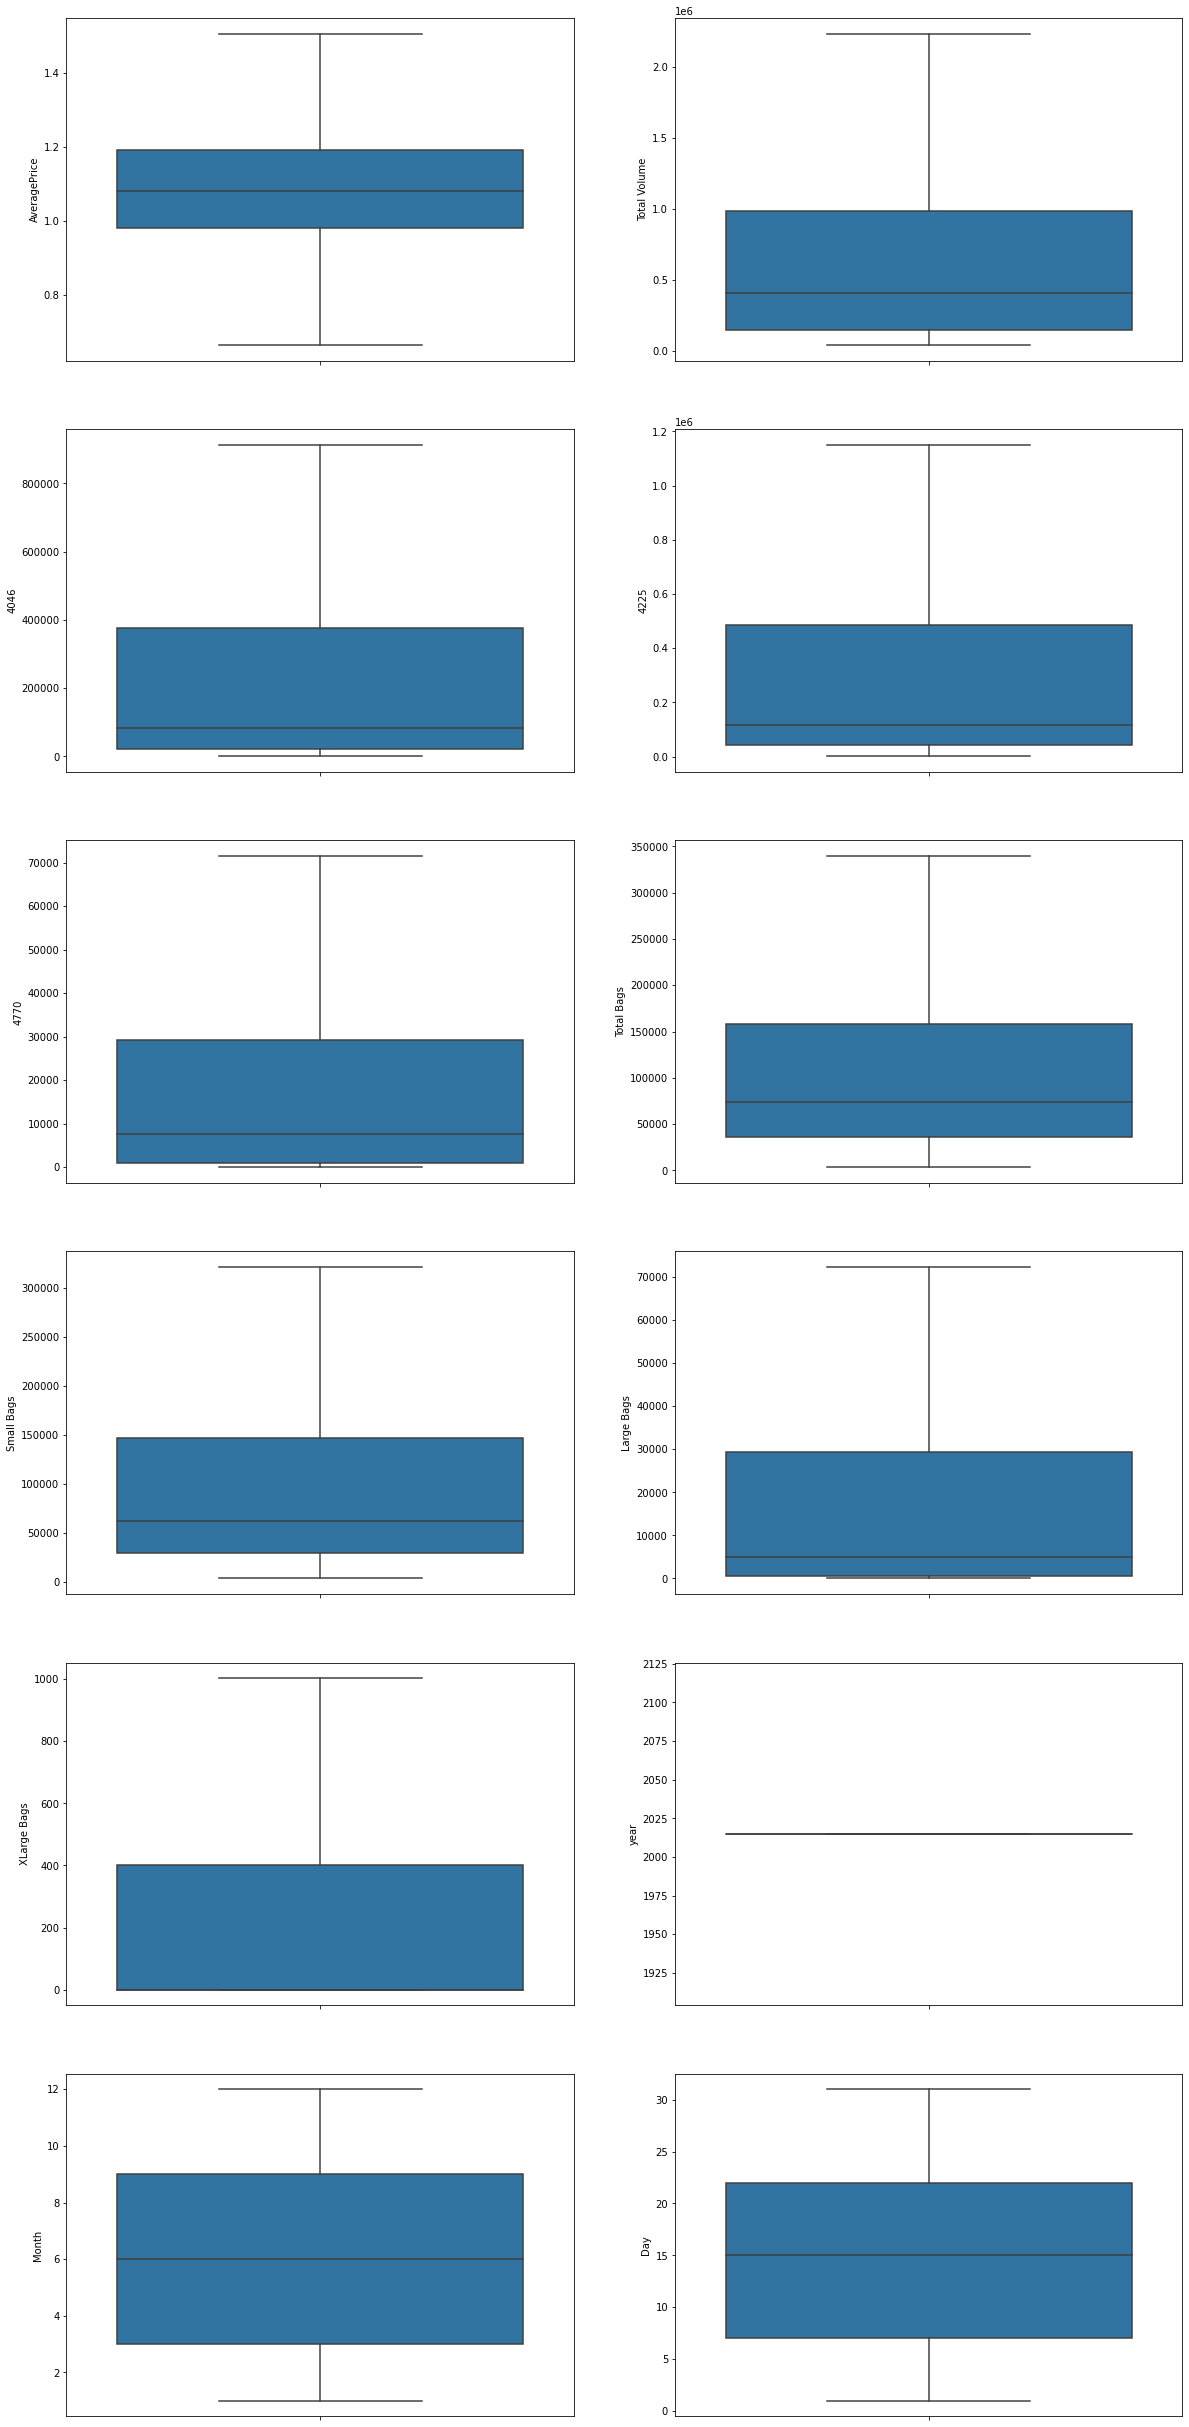

In [25]:
counter=1;
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'Month', 'Day']
plt.figure(figsize=(20,150))
for column in cols:
        plt.subplot(20,2,counter)
        counter=counter+1
        sns.boxplot(y=column,hue=column,data=df)

we can see no outliers are present now

# Scaling the data

In [26]:
from sklearn.preprocessing import MinMaxScaler 
scalar=MinMaxScaler()
s=scalar.fit_transform(df)
df = pd.DataFrame(s, columns = df.columns)

Data is scaled now

# Removing Skewness

In [27]:
final_df = df.drop('AveragePrice',axis=1)
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# Confirming removal of skewness

In [28]:
fin_df_new.skew()

Total Volume    0.338313
4046            0.501692
4225            0.454354
4770            0.443280
Total Bags      0.270894
Small Bags      0.323425
Large Bags      0.529902
XLarge Bags     0.880086
year            0.000000
Month          -0.039487
Day            -0.052029
dtype: float64

skewness is succesfully removed

# Train Test Split

In [29]:
fin_df_new = fin_df_new.join(df['AveragePrice'])

In [30]:
x=fin_df_new.drop('AveragePrice',axis=1)
y=fin_df_new['AveragePrice']

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)


Best R2 Score is 0.49050607079352526 on Random State 151


In [32]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=151)

# Model selection/prediction

# Linear Regression

In [33]:
lr=LinearRegression()
lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.1287249632050534
MSE: 0.02538648601073376
RMSE: 0.1593313717091953


In [35]:
print("Cross validation score:",cross_val_score(lr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.14356684735567407


# Ridge model

In [36]:
rr = Ridge(alpha=0.01)
rr.fit(train_x, train_y) 
predict= rr.predict(test_x)

In [37]:
print('MAE:', metrics.mean_absolute_error(test_y, predict))
print('MSE:', metrics.mean_squared_error(test_y, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,predict)))

MAE: 0.1287272781174881
MSE: 0.025387141742929335
RMSE: 0.15933342945825693


In [38]:
print("Cross validation score:",cross_val_score(rr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.143565114685494


# Lasso model

In [39]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(train_x, train_y) 
pred_l= model_lasso.predict(test_x)

In [40]:
print('MAE:', metrics.mean_absolute_error(test_y, pred_l))
print('MSE:', metrics.mean_squared_error(test_y, pred_l))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred_l)))

MAE: 0.1357881822256743
MSE: 0.02896022298781425
RMSE: 0.17017703425496125


In [41]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.14142909328703962


# Elastic model

In [42]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(train_x, train_y) 
pred_e= model_enet.predict(test_x)

In [43]:
print('MAE:', metrics.mean_absolute_error(test_y, pred_e))
print('MSE:', metrics.mean_squared_error(test_y, pred_e))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred_e)))

MAE: 0.1345147875337633
MSE: 0.028196358048853346
RMSE: 0.16791771213559736


In [44]:
print("Cross validation score:",cross_val_score(model_enet,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.14218442972008782


# Decision tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)
pred=dtr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.10043337510442775
MSE: 0.020487416457811197
RMSE: 0.14313426025173426


In [46]:
print("Cross validation score:",cross_val_score(dtr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.17787075465065305


# Random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(train_x,train_y)
pred1=rdr.predict(test_x)

In [48]:
print('MAE:', metrics.mean_absolute_error(test_y, pred1))
print('MSE:', metrics.mean_squared_error(test_y, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred1)))

MAE: 0.07835917049568365
MSE: 0.010582661413664922
RMSE: 0.10287206332948184


In [49]:
print("Cross validation score:",cross_val_score(rdr,x,y,scoring='neg_mean_absolute_error',cv=5).mean())

Cross validation score: -0.1382407352393291


We can see that Random forest Regression have the lowest Mean Absolute error, Therefore, We will perform Hypertuning on the Random Forest Model

# Model Hypertuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameter = {
 'max_depth': [100, 400, 800],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [52]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 800]})

In [53]:
GCV.best_params_

{'max_depth': 800,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

# Building Final model

In [54]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 800,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 200)
rdr.fit(train_x,train_y)
pred1=rdr.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, pred1))
print('MSE:', metrics.mean_squared_error(test_y, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y,pred1)))

MAE: 0.07808497698238655
MSE: 0.010436247393757581
RMSE: 0.10215795315959292


# saving the model

In [55]:
import joblib
joblib.dump(rdr,"avacado.pkl")


['avacado.pkl']